In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('cleaned_kaggle.csv')
df2 = pd.read_csv('RecipeNLG_dataset.csv')
df2.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [2]:
df2.drop(columns=df2.columns[0], axis=1, inplace=True)
df2.drop('link', axis=1, inplace=True)
df2.drop('source', axis=1, inplace=True)
df2.rename(columns={'ingredients': 'ing_measurements'}, inplace=True)

df2.head()


,title,ing_measurements,directions,NER
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...","[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....","[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...","[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...","[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...","[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [3]:
df1.head()

,name,minutes,nutrition,ingredients,vegan,vegetarian,milk,eggs,fish,shellfish,...,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbs_pdv,breakfast,lunch,dinner
0,arriba baked winter squash mexican style,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","['winter squash', 'mexican seasoning', 'mixed ...",0,1,1,0,0,0,...,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0,0,0
1,a bit different breakfast pizza,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","['prepared pizza crust', 'sausage patty', 'egg...",0,0,1,1,0,0,...,173.4,18.0,0.0,17.0,22.0,35.0,1.0,1,0,0
2,all in the kitchen chili,130,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","['ground beef', 'yellow onions', 'diced tomato...",0,0,1,0,0,0,...,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0,0,0
3,alouette potatoes,45,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]","['spreadable cheese with garlic and herbs', 'n...",0,0,1,1,0,0,...,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0,0,0
4,aww marinated olives,15,"[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]","['fennel seeds', 'green olives', 'ripe olives'...",1,1,0,0,0,0,...,380.7,53.0,7.0,24.0,6.0,24.0,6.0,0,0,0


In [4]:
#Format title of df2 to match name in df1

import string

df2['title'] = df2['title'].astype(str)
df2['title'] = df2['title'].str.lower()
df2['title'] = df2['title'].map(lambda x: x.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))))
df2.head()

,title,ing_measurements,directions,NER
0,no bake nut cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...","[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,jewell ball s chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....","[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,creamy corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...","[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,chicken funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...","[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,reeses cups candy,"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...","[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [5]:
#Create indexes on the name and title which will be used to join the 2 dfs

df2 = df2.replace('', np.nan)
df2.dropna(inplace=True)
df2.reset_index(drop=True, inplace=True)

df1.set_index('name', inplace = True)
df2.set_index('title', inplace = True)

In [6]:
df1.sort_index()

,minutes,nutrition,ingredients,vegan,vegetarian,milk,eggs,fish,shellfish,tree nuts,...,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbs_pdv,breakfast,lunch,dinner
name,,,,,,,,,,,,,,,,,,,,,
0 fat chunky watermelon salsa,45,"[57.7, 0.0, 39.0, 0.0, 2.0, 0.0, 4.0]","['lime', 'watermelon', 'cucumber', 'green onio...",0,1,0,0,0,0,1,...,57.7,0.0,39.0,0.0,2.0,0.0,4.0,0,0,0
0 point soup ww,55,"[26.8, 0.0, 11.0, 5.0, 2.0, 0.0, 1.0]","['garlic cloves', 'onion', 'carrots', 'red bel...",0,1,0,0,0,0,1,...,26.8,0.0,11.0,5.0,2.0,0.0,1.0,0,0,1
0 point soup crock pot,305,"[40.7, 0.0, 17.0, 2.0, 4.0, 0.0, 2.0]","['spinach', 'carrots', 'celery ribs', 'onion',...",0,1,0,0,0,0,0,...,40.7,0.0,17.0,2.0,4.0,0.0,2.0,0,1,0
1 00 tangy chicken recipe,280,"[969.6, 93.0, 55.0, 83.0, 148.0, 86.0, 7.0]","['chicken', 'cider vinegar', 'worcestershire s...",0,0,0,0,1,0,0,...,969.6,93.0,55.0,83.0,148.0,86.0,7.0,0,0,0
1 000 artichoke hearts,25,"[422.5, 25.0, 20.0, 46.0, 34.0, 43.0, 19.0]","['artichoke hearts', 'egg', 'unseasoned breadc...",0,1,1,1,0,0,1,...,422.5,25.0,20.0,46.0,34.0,43.0,19.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwiebelwhe swiss onion tart,165,"[440.1, 49.0, 15.0, 10.0, 22.0, 90.0, 9.0]","['flour', 'baking powder', 'kosher salt', 'uns...",0,0,1,1,0,0,1,...,440.1,49.0,15.0,10.0,22.0,90.0,9.0,0,0,0
zydeco salad,5,"[14.1, 0.0, 8.0, 0.0, 1.0, 0.0, 1.0]","['iceberg lettuce', 'tomatoes', '3 bean mix', ...",0,0,0,0,0,0,1,...,14.1,0.0,8.0,0.0,1.0,0.0,1.0,0,0,1
zydeco shrimp wrap,57,"[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]","['white rice', 'vegetable oil', 'onion', 'gree...",0,0,0,0,1,1,1,...,482.6,13.0,25.0,37.0,33.0,9.0,27.0,0,1,0


In [7]:
df2.sort_index()

,ing_measurements,directions,NER
title,,,
\t arugula pomegranate salad,"[""1/2 cup baby spinach"", ""1/2 cup baby arugula...","[""Toss together spinach and arugula, then plac...","[""baby spinach"", ""baby arugula"", ""pomegranate ..."
\t black bean and turkey chili,"[""1 tablespoon olive oil"", ""1 yellow onion"", ""...","[""Dice the onion and mince the garlic. Add the...","[""olive oil"", ""yellow onion"", ""garlic"", ""groun..."
\t finger lickin tofu nuggets,"[""350 grams extra firm tofu"", ""1/4 cup almond ...","[""Wrap the tofu in a clean tea towel and press...","[""extra firm"", ""almond flour"", ""nutritional ye..."
\t jerk beef stew with carrots and tomatoes,"[""1 tablespoon olive oil"", ""2 1/2 pounds bonel...","[""Preheat oven to 350 degrees F."", ""Heat the o...","[""olive oil"", ""boneless beef chuck"", ""onion"", ..."
\t pomegranate couscous salad,"[""2 cups pomegranate arils"", ""1 1/2 cups whole...","[""Place couscous in a bowl with 11/2 cups of h...","[""pomegranate arils"", ""whole wheat couscous"", ..."
...,...,...,...
綠豆湯 lv dou tang green bean soup,"[""250 grams green bean (mung bean)"", ""5 tables...","[""In a large bowl, cover green beans with cold...","[""green bean"", ""yellow rock sugar"", ""lily bulb..."
﻿crock pot asparagus mushroom soup for busy woman,"[""1/2 pound asparagus slice into 1 inch pieces...","[""Bring chicken stock to a simmer in medium sa...","[""mushroom"", ""chicken stock"", ""Carnation"", ""ga..."
﻿low fat raspberry summer sensation,"[""1 pint (2 cups) raspberry sorbet, softened"",...","[""9x5-inch loaf pan with foil. Spoon sorbet in...","[""raspberry sorbet"", ""Sugar"", ""cold fat-free"",..."


In [8]:
#join the two dataframes based on the recipe name

df = df1.join(df2, how = "inner")
df.shape

#Several recipes had the same name, so only the recipes with the highest similarity between ingredients cells was kept 

(545233, 27)

In [9]:
#For recipes with the same name, select the recipe with the highest similarity between ingredients cells

from difflib import SequenceMatcher as SM
                          
df['score'] = df.apply(lambda x: SM(None, x['ingredients'], x['NER']).ratio(), axis=1)
df.reset_index(drop=False, inplace=True)

df = df.sort_values(by=['name', 'score'])
df = df.drop_duplicates(subset='name', keep='first')

df.shape

(134626, 29)

In [10]:
df.head()

,name,minutes,nutrition,ingredients,vegan,vegetarian,milk,eggs,fish,shellfish,...,protein_pdv,saturated_fat_pdv,carbs_pdv,breakfast,lunch,dinner,ing_measurements,directions,NER,score
0,0 fat chunky watermelon salsa,45,"[57.7, 0.0, 39.0, 0.0, 2.0, 0.0, 4.0]","['lime', 'watermelon', 'cucumber', 'green onio...",0,1,0,0,0,0,...,2.0,0.0,4.0,0,0,0,"[""1 lime (peel and white pith removed)"", ""2 12...","[""Using a small sharp knife cut peel and white...","[""lime"", ""seeded watermelon"", ""cucumber"", ""gre...",0.750000
1,0 point soup ww,55,"[26.8, 0.0, 11.0, 5.0, 2.0, 0.0, 1.0]","['garlic cloves', 'onion', 'carrots', 'red bel...",0,1,0,0,0,0,...,2.0,0.0,1.0,0,0,1,"[""2 garlic cloves, minced"", ""1 onion, diced"", ...","[""Put first 12 ingredients (garlic - broth) in...","[""garlic"", ""onion"", ""carrots"", ""red bell peppe...",0.819484
2,1 1 1 tempura batter,5,"[526.5, 9.0, 2.0, 3.0, 38.0, 8.0, 31.0]","['egg', 'flour', 'water']",0,0,0,1,0,0,...,38.0,8.0,31.0,0,0,0,"[""1 egg"", ""1 cup flour"", ""1 cup water, ice cold""]","[""Mix all ingredients together with whisk unti...","[""egg"", ""flour"", ""water""]",0.760000
3,1 2 3 4 tater tot casserole,70,"[535.4, 44.0, 2.0, 39.0, 62.0, 56.0, 12.0]","['extra lean ground beef', 'cream of mushroom ...",0,0,1,0,0,0,...,62.0,56.0,12.0,0,0,0,"[""2 lbs extra lean ground beef"", ""1 (10 ounce)...","[""Preheat oven to 350\u00b0F."", ""Brown ground ...","[""extra lean ground beef"", ""cream of mushroom ...",0.828402
4,1 2 3 4 5 chinese spareribs,35,"[490.2, 52.0, 26.0, 46.0, 69.0, 63.0, 2.0]","['spareribs', 'cooking wine', 'sugar', 'vinega...",0,0,0,0,0,0,...,69.0,63.0,2.0,0,0,0,"[""1 -2 lb spareribs, each cut in thirds for sm...","[""Heat a large skillet with some oil in it, an...","[""spareribs"", ""cooking wine"", ""sugar"", ""vinega...",0.830986


In [11]:
df.tail()

,name,minutes,nutrition,ingredients,vegan,vegetarian,milk,eggs,fish,shellfish,...,protein_pdv,saturated_fat_pdv,carbs_pdv,breakfast,lunch,dinner,ing_measurements,directions,NER,score
545228,zwiebelbrotchen onion rolls,210,"[157.9, 3.0, 7.0, 0.0, 8.0, 5.0, 9.0]","['onions', 'sesame oil', 'yeast', 'water', 'su...",0,0,1,0,0,0,...,8.0,5.0,9.0,0,0,0,"[""2 onions, chopped fine"", ""1 tablespoon sesam...","[""Saute onions in sesame oil until golden."", ""...","[""onions"", ""sesame oil"", ""yeast"", ""water"", ""su...",0.806452
545229,zydeco salad,5,"[14.1, 0.0, 8.0, 0.0, 1.0, 0.0, 1.0]","['iceberg lettuce', 'tomatoes', '3 bean mix', ...",0,0,0,0,0,0,...,1.0,0.0,1.0,0,0,1,"[""4 cups shredded iceberg lettuce"", ""2 medium ...","[""Place the lettuce on a platter or serving di...","[""shredded iceberg lettuce"", ""tomatoes"", ""bean...",0.740741
545230,zydeco shrimp wrap,57,"[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]","['white rice', 'vegetable oil', 'onion', 'gree...",0,0,0,0,1,1,...,33.0,9.0,27.0,0,1,0,"[""1 cup white rice"", ""2 teaspoons vegetable oi...","[""Bring 3 quarts salted to water to a boil; ad...","[""white rice"", ""vegetable oil"", ""onion"", ""gree...",0.817143
545231,zydeco soup,60,"[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]","['celery', 'onion', 'green sweet pepper', 'gar...",0,0,0,0,0,0,...,44.0,21.0,15.0,0,0,0,"[""2 stalks celery, chopped, about 1 cup"", ""1 o...","[""Heat oil in a 4-quart Dutch oven. Add celery...","[""stalks celery"", ""onion"", ""green sweet pepper...",0.134557
545232,zydeco ya ya deviled eggs,40,"[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]","['hard-cooked eggs', 'mayonnaise', 'dijon must...",0,0,0,1,0,0,...,6.0,5.0,0.0,0,0,0,"[""6 hard-cooked eggs, peeled, cut in half, and...","[""In a bowl, combine the mashed yolks and mayo...","[""eggs"", ""mayonnaise"", ""Dijon mustard"", ""musta...",0.696296


In [14]:
df.drop('score', axis=1, inplace=True)

In [15]:
#Filtering out irrelevant recipes
df = df[~df['name'].str.contains('dressing', case=False)]
df = df[~df['name'].str.contains('seasoning', case=False)]
df = df[~df['name'].str.contains('spice rub', case=False)]
df = df[~df['name'].str.contains('flour substitute', case=False)]
df = df[~df['name'].str.contains('spread', case=False)]
df = df[~df['name'].str.contains('canning', case=False)]
df = df[~df['name'].str.contains('gluten free flour mix', case=False)]
df = df[~df['name'].str.contains('cleaning', case=False)]
df = df[~df['name'].str.contains('powder', case=False)]
df = df[~df['name'].str.contains('batter', case=False)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131065 entries, 0 to 545232
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               131065 non-null  object 
 1   minutes            131065 non-null  int64  
 2   nutrition          131065 non-null  object 
 3   ingredients        131065 non-null  object 
 4   vegan              131065 non-null  int64  
 5   vegetarian         131065 non-null  int64  
 6   milk               131065 non-null  int64  
 7   eggs               131065 non-null  int64  
 8   fish               131065 non-null  int64  
 9   shellfish          131065 non-null  int64  
 10  tree nuts          131065 non-null  int64  
 11  peanuts            131065 non-null  int64  
 12  wheat              131065 non-null  int64  
 13  soy                131065 non-null  int64  
 14  sesame             131065 non-null  int64  
 15  calories           131065 non-null  float64
 16  total_f

In [17]:
#Converting pdv values to grams 
df['total_fat_g'] = df['total_fat_pdv'] * 0.68
df['sugar_g'] = df['sugar_pdv'] * 0.25
df['sodium_mg'] = df['sodium_pdv'] * 23
df['protein_g'] = df['protein_pdv'] * 0.5
df['saturated_fat_g'] = df['saturated_fat_pdv'] * 0.2
df['carbs_g'] = df['carbs_pdv'] * 3.1

In [52]:
min(df['saturated_fat_pdv']), max(df['saturated_fat_pdv'])

(0.0, 10395.0)

In [53]:
min(df['sodium_pdv']), max(df['sodium_pdv'])

(0.0, 14664.0)

In [55]:
min(df['sugar_pdv']), max(df['sugar_pdv'])

(0.0, 18127.0)

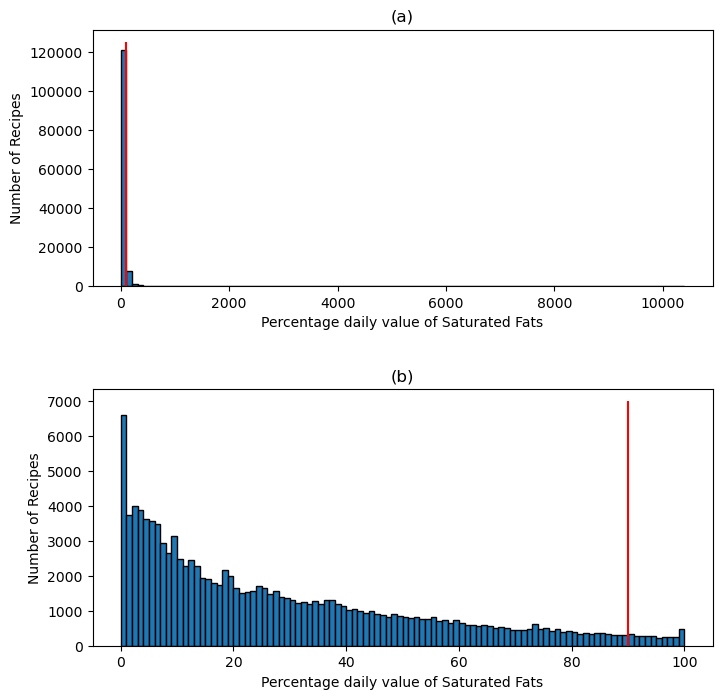

In [63]:
import matplotlib.pyplot as plt
 
plt.figure(figsize = (8,8))

plt.subplot(2,1,1)
plt.hist(df['saturated_fat_pdv'], bins=100, edgecolor='black')
plt.vlines(x = 90, color = 'red', ymin=0, ymax=125000)
plt.xlabel('Percentage daily value of Saturated Fats')
plt.ylabel('Number of Recipes')
plt.title('(a)')

plt.subplot(2,1,2)
plt.hist(df['saturated_fat_pdv'], bins=100, edgecolor='black', range=[0,100])
plt.vlines(x = 90, color = 'red', ymin=0, ymax=7000)
plt.xlabel('Percentage daily value of Saturated Fats')
plt.ylabel('Number of Recipes')
plt.title('(b)')

plt.subplots_adjust(hspace=0.4)

plt.savefig('saturated_fat.png', bbox_inches='tight')

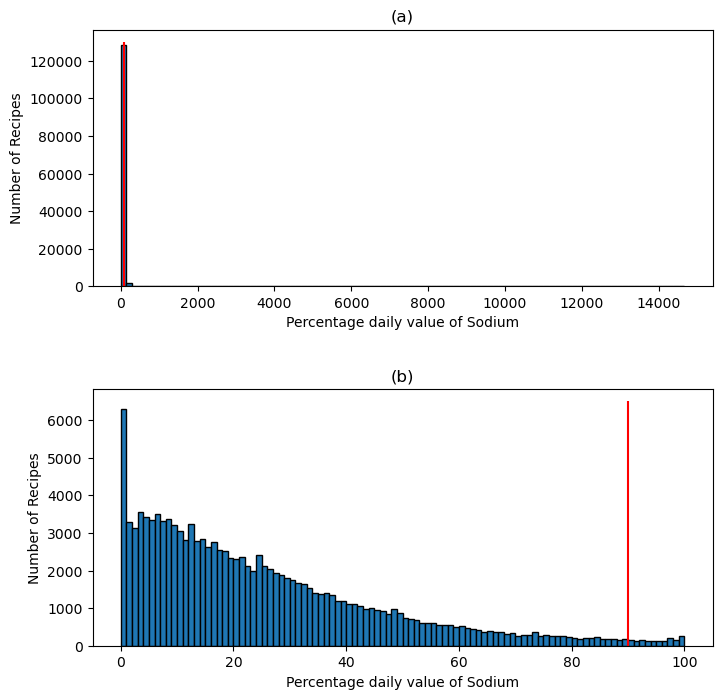

In [64]:
plt.figure(figsize = (8,8))

plt.subplot(2,1,1)
plt.hist(df['sodium_pdv'], bins=100, edgecolor='black')
plt.vlines(x = 90, color = 'red', ymin=0, ymax=130000)
plt.xlabel('Percentage daily value of Sodium')
plt.ylabel('Number of Recipes')
plt.title('(a)')

plt.subplot(2,1,2)
plt.hist(df['sodium_pdv'], bins=100, edgecolor='black', range=[0,100])
plt.vlines(x = 90, color = 'red', ymin=0, ymax=6500)
plt.xlabel('Percentage daily value of Sodium')
plt.ylabel('Number of Recipes')
plt.title('(b)')

plt.subplots_adjust(hspace=0.4)

plt.savefig('sodium.png', bbox_inches='tight')

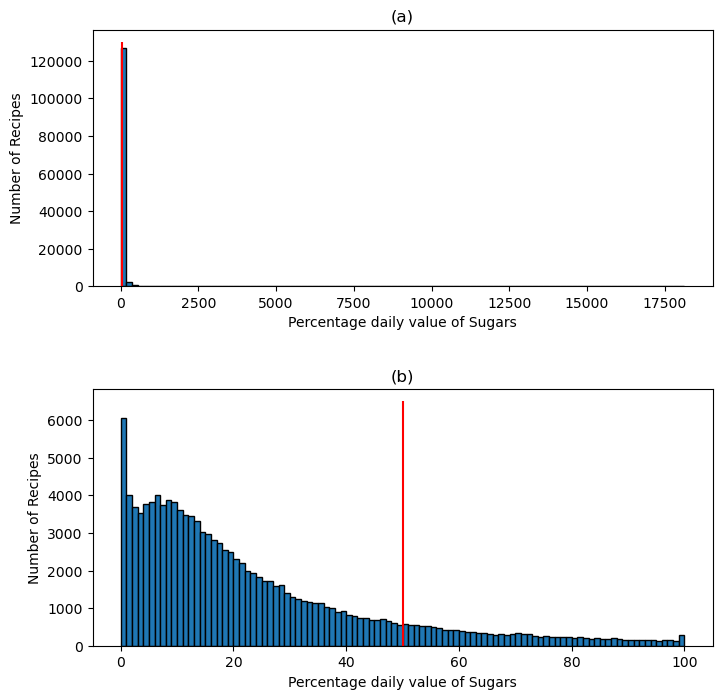

In [65]:
plt.figure(figsize = (8,8))

plt.subplot(2,1,1)
plt.hist(df['sugar_pdv'], bins=100, edgecolor='black')
plt.vlines(x = 50, color = 'red', ymin=0, ymax=130000)
plt.xlabel('Percentage daily value of Sugars')
plt.ylabel('Number of Recipes')
plt.title('(a)')

plt.subplot(2,1,2)
plt.hist(df['sugar_pdv'], bins=100, edgecolor='black', range=[0,100])
plt.vlines(x = 50, color = 'red', ymin=0, ymax=6500)
plt.xlabel('Percentage daily value of Sugars')
plt.ylabel('Number of Recipes')
plt.title('(b)')

plt.subplots_adjust(hspace=0.4)

plt.savefig('sugar.png', bbox_inches='tight')

In [67]:
#Filtering out unhealthy recipes (high in saturated fats, sugar and sodium)
df = df[df['saturated_fat_pdv'] <= 90]
df = df[df['sugar_pdv'] <= 50]
df = df[df['sodium_pdv'] <= 90]

In [17]:
# df.to_csv('matched_data.csv', index=False)